In [1]:
# Для запуска необходимо скопировать в папку CL_Cup IT 2024_Сбер_dataset.csv (слишком большой, не влезает в размер архива)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from scipy import stats

import datetime

In [3]:
pd.reset_option('all')

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_1916\2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [4]:
data_origin = pd.read_csv("CL_Cup IT 2024_Сбер_dataset.csv", parse_dates=['date_of', 'ctl_loading_date'])

In [5]:
rank = data_origin.groupby(['ctl_loading_date', 'ctl_loading']).count().reset_index()
rank['rank'] = rank.groupby('ctl_loading_date')['ctl_loading'].rank(method='dense').astype(int)
rank = rank.loc[:, ['ctl_loading_date', 'ctl_loading', 'rank']]
rank # номер поставки в день

,ctl_loading_date,ctl_loading,rank
0,2018-04-09,38463471715,1
1,2018-04-10,36624943566,1
2,2018-04-11,90124869960,1
3,2018-04-12,54580391004,1
4,2018-04-13,80543078668,1
...,...,...,...
2290,2024-03-11,30656997473,1
2291,2024-03-12,61550260885,1
2292,2024-03-13,57912146515,1
2293,2024-03-14,6038571654,1


In [6]:
duplicated_by_loading = data_origin.groupby(['ctl_loading_date', 'ctl_loading']).apply(lambda x: x.duplicated().sum()).reset_index()
duplicated_by_loading = duplicated_by_loading.rename(columns = {0: 'duplicated_by_loading'})
duplicated_by_loading # количество дублей

,ctl_loading_date,ctl_loading,duplicated_by_loading
0,2018-04-09,38463471715,12
1,2018-04-10,36624943566,7
2,2018-04-11,90124869960,12
3,2018-04-12,54580391004,10
4,2018-04-13,80543078668,10
...,...,...,...
2290,2024-03-11,30656997473,30
2291,2024-03-12,61550260885,26
2292,2024-03-13,57912146515,29
2293,2024-03-14,6038571654,26


In [7]:
data_duplicated = data_origin.copy()

In [8]:
data_duplicated['corrections'] = data_duplicated.loc[:, ['benchmark_id', 'date_of']].duplicated(['benchmark_id', 'date_of'])

In [9]:
data_corrections = data_duplicated.loc[:, ['ctl_loading_date', 'ctl_loading', 'corrections']].groupby(['ctl_loading_date', 'ctl_loading']).sum().reset_index()
data_corrections # количество корректировок прошлых данных в поставке (влючая те что корректируют данные внутри поставки)

,ctl_loading_date,ctl_loading,corrections
0,2018-04-09,38463471715,28
1,2018-04-10,36624943566,31
2,2018-04-11,90124869960,30
3,2018-04-12,54580391004,29
4,2018-04-13,80543078668,30
...,...,...,...
2290,2024-03-11,30656997473,34
2291,2024-03-12,61550260885,34
2292,2024-03-13,57912146515,34
2293,2024-03-14,6038571654,31


In [10]:
data_with_delay = data_origin.copy()

In [11]:
data_with_delay['delay'] = data_with_delay.ctl_loading_date - data_with_delay.date_of

In [12]:
data_delay = data_with_delay.loc[:, ['ctl_loading_date', 'ctl_loading', 'delay']].groupby(['ctl_loading_date', 'ctl_loading']).median().reset_index()
data_delay # медианная разница между днем рассчета и днем поставки по каждой поставке

,ctl_loading_date,ctl_loading,delay
0,2018-04-09,38463471715,0 days
1,2018-04-10,36624943566,0 days
2,2018-04-11,90124869960,0 days
3,2018-04-12,54580391004,0 days
4,2018-04-13,80543078668,0 days
...,...,...,...
2290,2024-03-11,30656997473,0 days
2291,2024-03-12,61550260885,0 days
2292,2024-03-13,57912146515,0 days
2293,2024-03-14,6038571654,0 days


In [13]:
data_with_day_of_week= data_origin.copy()

In [14]:
data_with_day_of_week['day_of_week'] = data_with_day_of_week['ctl_loading_date'].dt.day_of_week
data_day_of_week = data_with_day_of_week.loc[:, ['ctl_loading_date', 'ctl_loading', 'day_of_week']].groupby(['ctl_loading_date', 'ctl_loading']).min().reset_index()
data_day_of_week # день недели по каждой поставке

,ctl_loading_date,ctl_loading,day_of_week
0,2018-04-09,38463471715,0
1,2018-04-10,36624943566,1
2,2018-04-11,90124869960,2
3,2018-04-12,54580391004,3
4,2018-04-13,80543078668,4
...,...,...,...
2290,2024-03-11,30656997473,0
2291,2024-03-12,61550260885,1
2292,2024-03-13,57912146515,2
2293,2024-03-14,6038571654,3


In [15]:
all_dates = pd.date_range(start='2018-04-09', end='2024-03-15')
data_missing_days = data_day_of_week.loc[:, ['ctl_loading_date', 'ctl_loading']]

In [16]:
df_full = pd.DataFrame({'ctl_loading_date': all_dates})
df_merged = pd.merge(df_full, data_missing_days, on='ctl_loading_date', how='left')

In [17]:
df_merged['missing_day'] = df_merged['ctl_loading'].isna()

In [18]:
df_merged['cumulative_missing_days'] = df_merged['missing_day'].cumsum()

In [19]:
missing_day_cumsum = data_missing_days.merge(df_merged[['ctl_loading_date', 'ctl_loading', 'cumulative_missing_days']], on=['ctl_loading_date', 'ctl_loading'], how='left')
missing_day_cumsum # накопленное количество пропущенных дней

,ctl_loading_date,ctl_loading,cumulative_missing_days
0,2018-04-09,38463471715,0
1,2018-04-10,36624943566,0
2,2018-04-11,90124869960,0
3,2018-04-12,54580391004,0
4,2018-04-13,80543078668,0
...,...,...,...
2290,2024-03-11,30656997473,162
2291,2024-03-12,61550260885,162
2292,2024-03-13,57912146515,162
2293,2024-03-14,6038571654,162


In [20]:
rank['r2_cumsum'] = (rank['rank'] == 2).cumsum()
rank['r3_cumsum'] = (rank['rank'] == 3).cumsum()
rank['r4_cumsum'] = (rank['rank'] == 4).cumsum()
rank['r5_cumsum'] = (rank['rank'] == 5).cumsum()
rank['r6_cumsum'] = (rank['rank'] == 6).cumsum()
rank # накопленная сумма значений по каждому значению ранга

,ctl_loading_date,ctl_loading,rank,r2_cumsum,r3_cumsum,r4_cumsum,r5_cumsum,r6_cumsum
0,2018-04-09,38463471715,1,0,0,0,0,0
1,2018-04-10,36624943566,1,0,0,0,0,0
2,2018-04-11,90124869960,1,0,0,0,0,0
3,2018-04-12,54580391004,1,0,0,0,0,0
4,2018-04-13,80543078668,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2290,2024-03-11,30656997473,1,176,54,34,18,7
2291,2024-03-12,61550260885,1,176,54,34,18,7
2292,2024-03-13,57912146515,1,176,54,34,18,7
2293,2024-03-14,6038571654,1,176,54,34,18,7


In [21]:
string_count = data_origin.groupby(['ctl_loading_date', 'ctl_loading']).count().reset_index().loc[:, ['ctl_loading_date', 'ctl_loading', 'quote']]
string_count = string_count.rename(columns={'quote': 'string_quantity'})
string_count # количество строк по поставке

,ctl_loading_date,ctl_loading,string_quantity
0,2018-04-09,38463471715,435
1,2018-04-10,36624943566,476
2,2018-04-11,90124869960,458
3,2018-04-12,54580391004,443
4,2018-04-13,80543078668,458
...,...,...,...
2290,2024-03-11,30656997473,467
2291,2024-03-12,61550260885,458
2292,2024-03-13,57912146515,458
2293,2024-03-14,6038571654,422


# Сливаем все признаки

In [22]:
s_d = pd.merge(string_count, duplicated_by_loading, on=['ctl_loading_date', 'ctl_loading'], how='left')
s_d_c = pd.merge(s_d, data_corrections, on=['ctl_loading_date', 'ctl_loading'], how='left')
s_d_c_d = pd.merge(s_d_c, data_delay, on=['ctl_loading_date', 'ctl_loading'], how='left')
s_d_c_d_w = pd.merge(s_d_c_d, data_day_of_week, on=['ctl_loading_date', 'ctl_loading'], how='left')
s_d_c_d_w_m = pd.merge(s_d_c_d_w, missing_day_cumsum, on=['ctl_loading_date', 'ctl_loading'], how='left')

s_d_c_d_w_m = s_d_c_d_w_m.sort_values(by=['ctl_loading_date', 'delay', 'string_quantity'], ascending=[True, True, False])
s_d_c_d_w_m['rank'] = s_d_c_d_w_m.groupby('ctl_loading_date').cumcount() + 1
data_signs = s_d_c_d_w_m

In [23]:
data_signs

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank
0,2018-04-09,38463471715,435,12,28,0 days,0,0,1
1,2018-04-10,36624943566,476,7,31,0 days,1,0,1
2,2018-04-11,90124869960,458,12,30,0 days,2,0,1
3,2018-04-12,54580391004,443,10,29,0 days,3,0,1
4,2018-04-13,80543078668,458,10,30,0 days,4,0,1
...,...,...,...,...,...,...,...,...,...
2290,2024-03-11,30656997473,467,30,34,0 days,0,162,1
2291,2024-03-12,61550260885,458,26,34,0 days,1,162,1
2292,2024-03-13,57912146515,458,29,34,0 days,2,162,1
2293,2024-03-14,6038571654,422,26,31,0 days,3,162,1


In [24]:
data_signs[data_signs.ctl_loading_date == '2019-05-03']

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank
396,2019-05-03,80915383622,419,15,26,0 days,4,19,1
395,2019-05-03,46185753271,32,0,32,347 days,4,19,2


In [25]:
data_signs.to_csv('data_signs.csv')

# Размечаем данные для классификации

In [26]:
data_signs_anjusted_for_dupls = (data_signs.string_quantity - data_signs.duplicated_by_loading)

d:\Programming\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

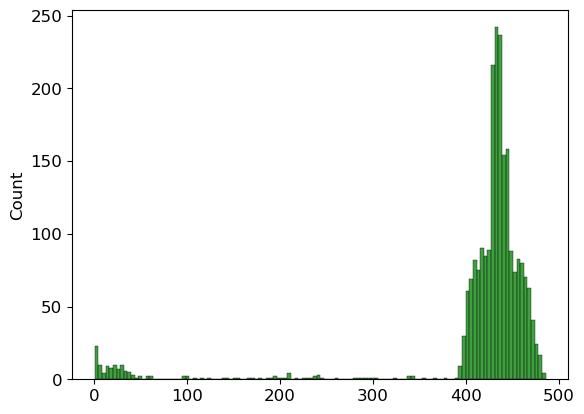

In [27]:
plt.rcParams['font.size'] = 12 
sns.histplot(data_signs_anjusted_for_dupls, color='green')

In [28]:
x = data_signs_anjusted_for_dupls[data_signs_anjusted_for_dupls> data_signs_anjusted_for_dupls.mean() - data_signs_anjusted_for_dupls.std()]

d:\Programming\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

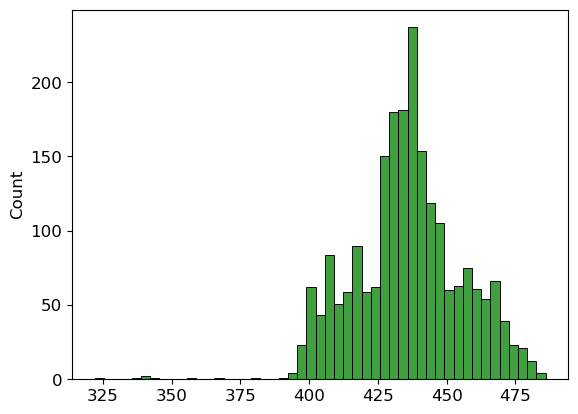

In [29]:
sns.histplot(x, color='green')

In [30]:
under_delivery_threshold = x.mean() - 1*x.std()

In [31]:
under_delivery_threshold

416.3818621159904

In [32]:
outliers = data_signs.apply(
    lambda row: row['string_quantity']-row['duplicated_by_loading'] < under_delivery_threshold if row['rank'] == 1 else False, 
    axis=1
)

In [33]:
outliers_all = data_signs[outliers]
outliers_all

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank
6,2018-04-15,61093947578,422,7,26,0 days,6,0,1
8,2018-04-17,43797555261,424,10,26,0 days,1,0,1
17,2018-04-26,25902764987,428,14,27,0 days,3,0,1
18,2018-04-27,92328498590,428,12,27,0 days,4,0,1
26,2018-05-05,29731994185,426,11,26,0 days,5,0,1
...,...,...,...,...,...,...,...,...,...
2268,2024-02-21,53098448173,431,25,31,0 days,2,158,1
2278,2024-02-29,1884005607,424,25,31,0 days,3,158,1
2279,2024-03-01,62433216496,436,29,31,0 days,4,158,1
2287,2024-03-08,70519729204,438,28,32,0 days,4,162,1


In [34]:
data_signs['outliers'] = outliers

In [35]:
data_signs['outliers'] = data_signs['outliers'].astype('int')

In [36]:
outliers2 = data_signs.apply(
    lambda row: row['string_quantity']-row['duplicated_by_loading'] < under_delivery_threshold if row['rank'] >= 2 else False, 
    axis=1
)

In [37]:
data_signs[outliers2]

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,outliers
76,2018-06-26,85145287403,423,14,25,2 days,1,8,3,0
78,2018-06-26,90027618990,239,1,5,3 days,1,8,4,0
83,2018-06-30,67122335489,246,5,27,7 days,5,8,2,0
114,2018-07-30,92503314330,350,8,28,1 days,0,8,2,0
227,2018-11-20,98315908034,425,13,27,2 days,1,12,3,0
...,...,...,...,...,...,...,...,...,...,...
2259,2024-02-14,37253249179,8,0,8,494 days,2,158,3,0
2271,2024-02-23,64930945244,22,0,22,19 days,4,158,2,0
2277,2024-02-28,29507947487,2,0,2,179 days,2,158,2,0
2280,2024-03-06,11589452847,22,0,22,67 days,2,162,2,0


In [38]:
data_signs[data_signs['rank'] == 2][data_signs['delay'] >= datetime.timedelta(0)]

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_1916\1172430449.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_signs[data_signs['rank'] == 2][data_signs['delay'] >= datetime.timedelta(0)]


,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,outliers
49,2018-05-29,12167897034,458,13,30,1 days,1,1,2,0
59,2018-06-07,66504582038,470,13,31,1 days,3,3,2,0
73,2018-06-26,407853497,463,13,30,1 days,1,8,2,0
83,2018-06-30,67122335489,246,5,27,7 days,5,8,2,0
114,2018-07-30,92503314330,350,8,28,1 days,0,8,2,0
...,...,...,...,...,...,...,...,...,...,...
2261,2024-02-14,55249978372,1,0,1,91 days,2,158,2,0
2271,2024-02-23,64930945244,22,0,22,19 days,4,158,2,0
2277,2024-02-28,29507947487,2,0,2,179 days,2,158,2,0
2280,2024-03-06,11589452847,22,0,22,67 days,2,162,2,0


In [39]:
data_signs['outliers'] += outliers2.astype('int')*2

In [40]:
data_signs.to_csv('data_signs_with_outliers.csv')

In [41]:
data_signs.outliers.unique()

array([0, 1, 2])

In [44]:
data_signs['rank'].max()

6